# Drawing hyperbolic group actions

The `geometry_tools` package is handy for drawing pictures of tilings in $\mathbb{H}^2$. Here we will work with visualizing a (2,3,7) triangular tiling.

In [1]:
# get a representation for a triangle group.
# (these are built in to the program)
from geometry_tools import hyperbolic, coxeter, drawtools

triangle_rep = coxeter.TriangleGroup((2,3,7)).hyperbolic_rep()

We can draw the reflection walls for the group:

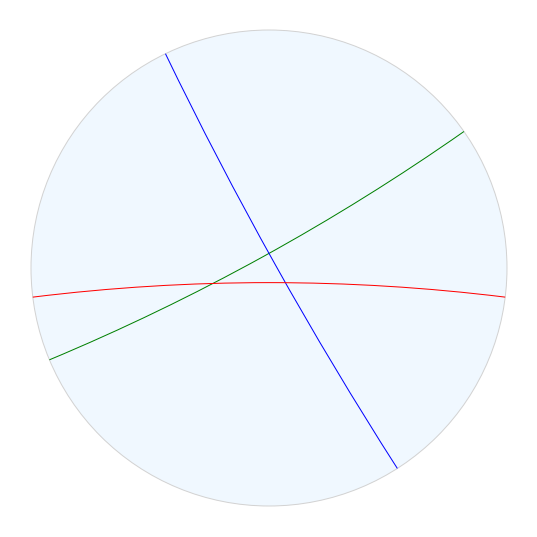

In [2]:
# find the fixed points at infinity for the generating reflections

reflections = triangle_rep.isometries(["a", "b", "c"])
walls = hyperbolic.Geodesic.from_reflection(reflections)

wall_a, wall_b, wall_c = walls

fig = drawtools.HyperbolicDrawing(model="poincare")
fig.draw_plane()

fig.draw_geodesic(wall_a, color="green")
fig.draw_geodesic(wall_b, color="blue")
fig.draw_geodesic(wall_c, color="red")


We can find a fundamental domain for the triangle group by taking the triangle whose vertices are the fixed points of length-2 elements of the group.

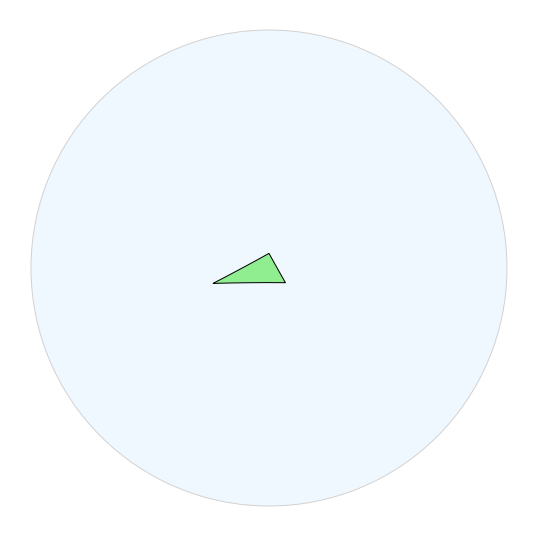

In [3]:
triangle_vertices = triangle_rep.isometries(["ab", "bc", "ac"]).fixed_point()

fund_triangle = hyperbolic.Polygon(triangle_vertices)

fig = drawtools.HyperbolicDrawing(model="poincare")

fig.draw_plane()
fig.draw_polygon(fund_triangle, facecolor="lightgreen")

If we want to start visualizing the tiling of $\mathbb{H}^2$ we get from this triangle group, we can start drawing translates of this fundamental domain. The easy (but less efficient and appealing) way to do this is to just draw copies of the fundamental domain translated by the images of freely reduced works in the group.

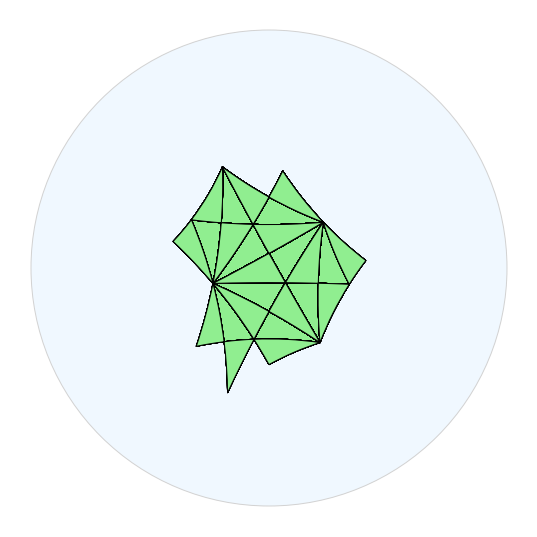

In [4]:
words = triangle_rep.free_words_less_than(5)
isometries = triangle_rep.isometries(words)

tiles = isometries @ fund_triangle

fig = drawtools.HyperbolicDrawing(model="poincare")
fig.draw_plane()

fig.draw_polygon(tiles, facecolor="lightgreen")

### Speeding things up with finite-state automata

Drawing copies of the triangle translated by images of all freely reduced words is a little slow. And, we end up drawing the same triangle on top of itself many times. We can speed up the process by picking a *unique* word for each element of the group, using a *finite-state automaton.*

The `geometry_tools.automata` subpackage provides a handful of tools for working with finite-state automata. It can load and manipulate the automata generated by the [kbmag](https://gap-packages.github.io/kbmag/) program. While `kbmag` is not included with `geometry_tools`, the package does provide precomputed automata for a number of word-hyperbolic groups. To get the list of precomputed automata, import the `automata.fsa` submodule and call `fsa.list_builtins()`. Call `fsa.load_builtin()` to load an automaton.

Thanks to code provided by [Florian Stecker](https://florianstecker.de/), the `geometry_tools` package can also generate automata for any Coxeter group. So we can get an automaton for the (2,3,7) triangle group like so:

In [5]:
# construct the (2,3,7) automaton
triangle_fsa = coxeter.TriangleGroup((2,3,7)).automaton()

# get a unique word for each group element of length < 25.
# (we convert to a list since enumerate_words returns a generator)
words = list(triangle_fsa.enumerate_words(30))

free_words = list(triangle_rep.free_words_less_than(9))

# compare unique words of length <30 to freely reduced words of length <9.
# when we don't consider the relation, we get many redundant words!
len(words), len(free_words)

(5951, 585937)

To make the picture a little nicer, we can produce an automaton which only accepts words of even length. Then we can get the collection of all isometries which are images of words accepted by this automaton.

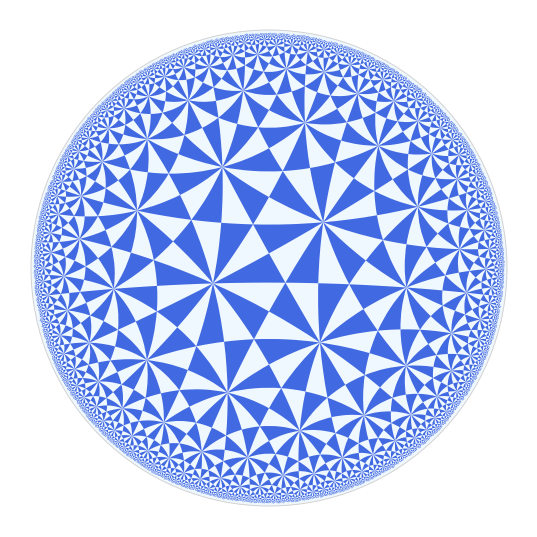

In [6]:
even_triangle_fsa = triangle_fsa.even_automaton()
pos_isometries = triangle_rep.automaton_accepted(even_triangle_fsa, 15)

tiles = pos_isometries @ fund_triangle

fig = drawtools.HyperbolicDrawing()
fig.draw_plane()
fig.draw_polygon(tiles, facecolor="royalblue", edgecolor="none")

To recap, here's all the code we need to produce the above picture:

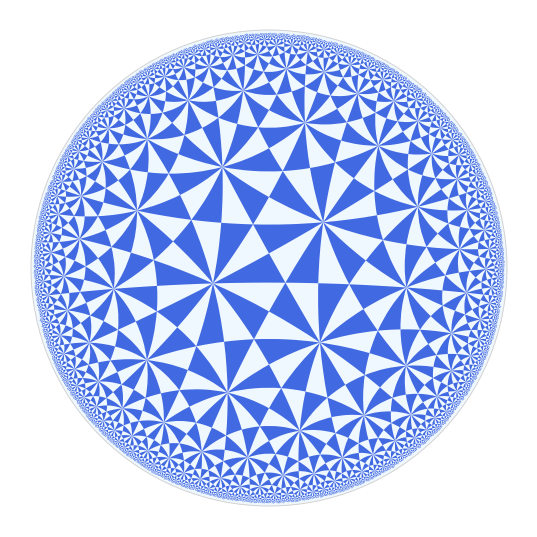

In [7]:
from geometry_tools import hyperbolic, coxeter, drawtools

# make the triangle group representation
triangle_group = coxeter.TriangleGroup((2,3,7))
triangle_rep = triangle_group.hyperbolic_rep()

# find a fundamental domain for the action by finding 
# fixed points of length-2 elements
vertices = triangle_rep.isometries(["ab", "bc", "ca"]).fixed_point()
fund_triangle = hyperbolic.Polygon(vertices)

# find all orientation-preserving isometries of length at most 30 using an automaton
triangle_fsa = triangle_group.automaton(even_length=True)
pos_isometries = triangle_rep.automaton_accepted(triangle_fsa, 15)

# draw the translated triangles
fig = drawtools.HyperbolicDrawing(model="poincare")
fig.draw_plane()
fig.draw_polygon(pos_isometries @ fund_triangle, 
                 facecolor="royalblue", edgecolor="none")